<a href="https://colab.research.google.com/github/koto253/DATA_611/blob/main/Module09_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework Week 09

1. Explain how does the k-means algorithm work?
2. Base on the given data set (https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv), apply k-mean clustering, identify the number of clusters using the elbow method, present the results by scatter plot.
3. Apply silhouette analysis on the above k-mean clustering.

**1. Explain how does the k-means algorithm work?**

K-means is a simple clustering algorithm.
It groups similar data points into 'k' clusters by repeatedly calculating cluster centers and assigning points to the nearest center. It converges when assignments no longer change much, creating distinct clusters based on data similarities.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv')

In [12]:
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

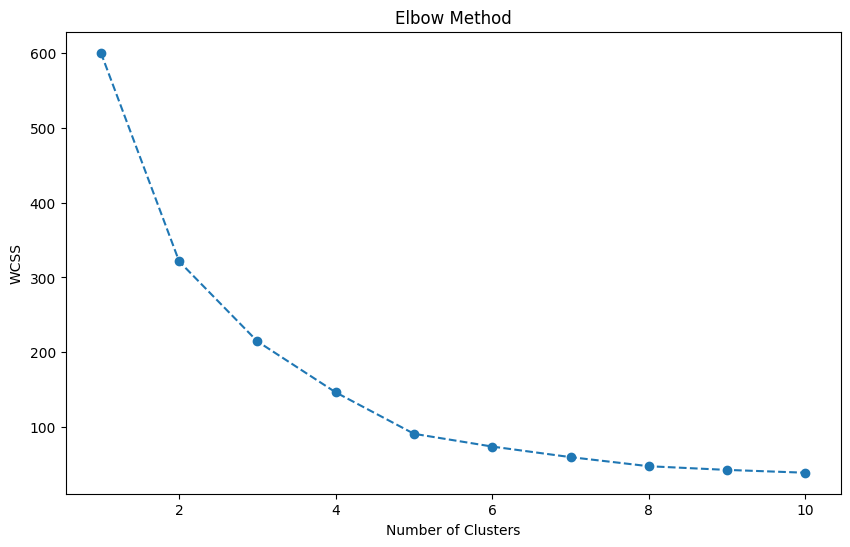

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


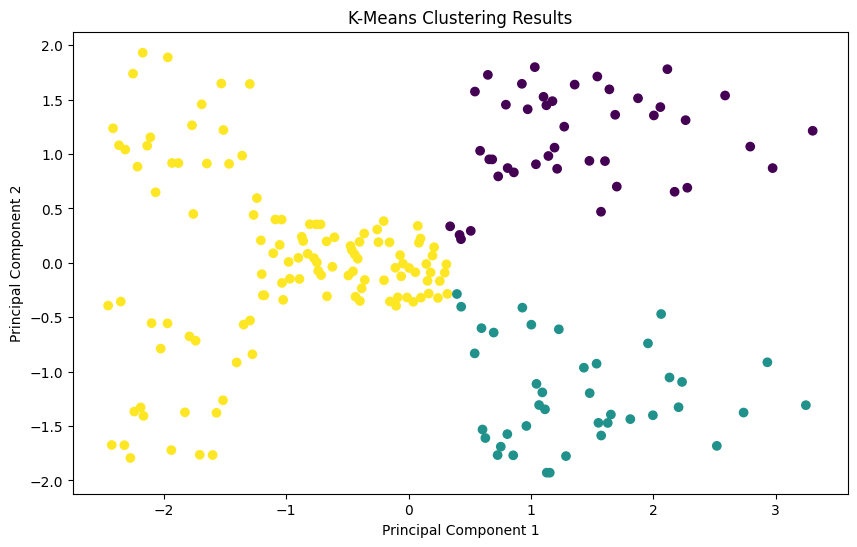

Silhouette Score: 0.48398108948991264


In [13]:
# Read the data
data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv')

# Drop non-numeric columns if necessary
data_numeric = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Apply PCA for dimensionality reduction (optional, for visualization purposes)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on the elbow point
num_clusters = 3  # You can change this based on the elbow point

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data_scaled)

# Add cluster labels to the DataFrame
data['Cluster'] = cluster_labels

# Create a scatter plot of the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Apply silhouette analysis to evaluate cluster quality
silhouette_avg = silhouette_score(data_scaled, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')